In [76]:
import pandas as pd
import glob
import os 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
def barplot_3_lines(tmp_plot, col1, col2, col3, x_var, sample_type, save_suffix, base_plot, save):
    plt.figure(figsize = (20, 6))#set the width of the bars
    plt.grid()
    font_labels = 12
    pos_text_y = 6
    lw = 2
    ms = 6
    # plot bars in stack manner
    ax1 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col1], markersize = ms,
                  color='r', marker= 's', linewidth=lw, label = col1, alpha=0.7)
    ax2 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col2], markersize = ms,
                  color='g',  marker= 'v', linewidth=lw, label = col2, alpha=0.7)
    ax3 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col3], markersize = ms,
                  color='b', marker= 'o', linewidth=lw, label = col3, alpha=0.7)
    
    plt.xticks(rotation=90, ticks=np.arange(len(tmp_plot[x_var])),
               labels=tmp_plot[x_var],  fontsize=font_labels + 2 ) 
    
    plt.yticks(fontsize=font_labels + 2) 
    plt.legend(loc='upper left', fontsize=font_labels)  #,  bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#     for r1, r2, r3 in zip(ax1, ax2, ax3):
#         h1 = r1.get_height()
#         h2 = r2.get_height()
#         h3 = r3.get_height()
#         upset = 0.7
#         plt.text(r1.get_x() + r1.get_width() / 2., h1 + upset , "%d" % h1, 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
#         plt.text(r2.get_x() + r2.get_width() / 2., h2 + upset , "%d" % h2 , 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
#         plt.text(r3.get_x() + r3.get_width() / 2., h3 + upset , "%d" % h3, 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
    plt.title(sample_type, fontsize=font_labels + 2)
    plt.ylabel('Number of unique SNS validated peptide', fontsize=font_labels + 3)
    name = f'Compare_SNSmethods_{sample_type}_{save_suffix}'
    save_path = os.path.join(base_plot, f'{name}.pdf')
    print(save_path)
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')
    plt.show() # write function

In [98]:
def barplot_3_bars(tmp_plot, col1, col2, col3, x_var, sample_type, save_suffix, base_plot, save):

    plt.figure(figsize = (20, 6))#set the width of the bars
    font_labels = 12
    pos_text_y = 6
    w = 0.2
    # plot bars in stack manner
    ax1 = plt.bar(np.arange(len(tmp_plot[x_var])), tmp_plot[col1], width=w,
                  color='darkkhaki', edgecolor= 'k', linewidth=0.7, label = col1)
    ax2 = plt.bar(np.arange(len(tmp_plot[x_var])) + 0.2, tmp_plot[col2], width=w,
                  color='orange',  edgecolor= 'k', linewidth=0.7, label = col2)
    ax3 = plt.bar(np.arange(len(tmp_plot[x_var])) + 0.4, tmp_plot[col3], width=w,
                  color='lightblue', edgecolor= 'k', linewidth=0.7, label = col3)
    plt.xticks(rotation=90, ticks=np.arange(len(tmp_plot[x_var])) + 0.3,
               labels=tmp_plot[x_var],  fontsize=font_labels + 2 ) 
    plt.yticks(fontsize=font_labels + 2) 
    plt.legend(loc='upper left', fontsize=font_labels)  #,  bbox_to_anchor=(0.5, 0., 0.5, 0.5))
    for r1, r2, r3 in zip(ax1, ax2, ax3):
        h1 = r1.get_height()
        h2 = r2.get_height()
        h3 = r3.get_height()
        upset = 0.7
        plt.text(r1.get_x() + r1.get_width() / 2., h1 + upset , "%d" % h1, 
                 ha="center", va="bottom", color="black", fontsize=font_labels)
        plt.text(r2.get_x() + r2.get_width() / 2., h2 + upset , "%d" % h2 , 
                 ha="center", va="bottom", color="black", fontsize=font_labels)
        plt.text(r3.get_x() + r3.get_width() / 2., h3 + upset , "%d" % h3, 
                 ha="center", va="bottom", color="black", fontsize=font_labels)

    plt.ylabel('Number of unique kmer candidates', fontsize=font_labels + 3)
    name = f'Filtering_2pipelines_kmers_{sample_type}_{save_suffix}'
    save_path = os.path.join(base_plot, f'{name}.pdf')
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')
    plt.show() # write function

In [88]:
def reader_assign_conf(path):
    print(f'Reading {path}')
    df = pd.read_csv(path, sep = '\t')
    print(f'With Shape: {df.shape[0]}')
    assert('delta_cn' in df.columns)
    df_filtered = df.loc[df['tdc q-value'] < 0.05]
    val = len(set(df_filtered['unmodified sequence']))
    val_rate = val / len(set(df['unmodified sequence']))
    print(f'Number of validated unique peptides: {val}')
    print(f'Validation Rate: {np.round(val_rate * 100 , 2)} percent')
    return val, val_rate 

In [131]:
experiment_list = [ i.split('/')[-1] for i in glob.glob(path_single + '/*')]

In [151]:
# INPUTS 
basedir = '/cluster/work/grlab/projects/projects2020_OHSU/proteomics'
pipelines = ['ETH', 'OHSU']
samples = ['TCGA-24-1431']

FDR_limit = 0.05

# Parse: results for all experiments

In [159]:
results = {'sample':[], 'experiment': [], 'pipeline': [],
           '#peptides_FDR_single': [], '#peptides_FDR_poolExp': [],  '#peptides_FDR_poolExp_unionPipelines': [], 
          'valRate_FDR_single': [], 'valRate_FDR_poolExp': [],  'valRate_FDR_poolExp_unionPipelines': []}


for sample in samples:
    for pipeline in pipelines:
        path_single = os.path.join(basedir, pipeline, sample, 'assign_conf_per_experiment')
        path_pool_pipeline = os.path.join(basedir, pipeline, sample, 'assign_conf_pooled_FDR')
        path_pool_union = os.path.join(basedir, 'assign_conf_joint_to_ETH', sample)

        for experiment in experiment_list:
            results['pipeline'].append(pipeline)
            results['sample'].append(sample)
            if pipeline == 'OHSU':
                results['experiment'].append(experiment[1:]) # leading 'J'
                load_name = experiment
            else:
                results['experiment'].append(experiment)
                load_name = experiment
               
                
            # search 1 experiment, 1 pipeline  
            df_single = os.path.join(path_single, load_name, 'assign-confidence.target.txt')
            val, val_rate  = reader_assign_conf(df_single)
            results['#peptides_FDR_single'].append(val)
            results['valRate_FDR_single'].append(val_rate)

            # search all experiments, 1 pipeline
            df_pool_pipeline = os.path.join(path_pool_pipeline, f'tsearch-{load_name}.txt')
            val, val_rate  = reader_assign_conf(df_pool_pipeline)
            results['#peptides_FDR_poolExp'].append(val)
            results['valRate_FDR_poolExp'].append(val_rate)

            # search all experiments, 1 union of pipelines
            df_pool_union = os.path.join(path_pool_union, f'tsearch-{load_name}.txt')
            val, val_rate  = reader_assign_conf(df_pool_union)
            results[ '#peptides_FDR_poolExp_unionPipelines'].append(val)
            results['valRate_FDR_poolExp_unionPipelines'].append(val_rate)

            print('\n')


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0AN0XGA/assign-confidence.target.txt
With Shape: 82660
Number of validated unique peptides: 59
Validation Rate: 2.79 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0AN0XGA.txt
With Shape: 44839
Number of validated unique peptides: 45
Validation Rate: 2.33 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0AN0XGA.txt
With Shape: 9394
Number of validated unique peptides: 45
Validation Rate: 2.89 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0210XGA/assign-confidence.target.txt
With Shape: 67461
Number of validated unique peptides: 49
Validation Rate: 2.83 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_F

With Shape: 123115
Number of validated unique peptides: 82
Validation Rate: 2.61 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0A13AGA.txt
With Shape: 66690
Number of validated unique peptides: 75
Validation Rate: 2.59 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0A13AGA.txt
With Shape: 14000
Number of validated unique peptides: 77
Validation Rate: 3.29 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0213XGA/assign-confidence.target.txt
With Shape: 102997
Number of validated unique peptides: 67
Validation Rate: 2.54 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0213XGA.txt
With Shape: 55577
Number of validated unique peptides: 61
Validation Rate: 2.51 percent
Reading /cluster/work/grlab/proje

With Shape: 69588
Number of validated unique peptides: 56
Validation Rate: 3.15 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0A531GA.txt
With Shape: 38097
Number of validated unique peptides: 43
Validation Rate: 2.65 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0A531GA.txt
With Shape: 7804
Number of validated unique peptides: 43
Validation Rate: 3.3 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/02102GA/assign-confidence.target.txt
With Shape: 67461
Number of validated unique peptides: 49
Validation Rate: 2.83 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-02102GA.txt
With Shape: 36422
Number of validated unique peptides: 38
Validation Rate: 2.4 percent
Reading /cluster/work/grlab/projects/p

With Shape: 12419
Number of validated unique peptides: 73
Validation Rate: 3.51 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/021AAGA/assign-confidence.target.txt
With Shape: 133991
Number of validated unique peptides: 88
Validation Rate: 2.54 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-021AAGA.txt
With Shape: 72417
Number of validated unique peptides: 82
Validation Rate: 2.57 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-021AAGA.txt
With Shape: 15245
Number of validated unique peptides: 84
Validation Rate: 3.28 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0250XGA/assign-confidence.target.txt
With Shape: 37333
Number of validated unique peptides: 26
Validation Rate: 2.72 percent
Reading /cl

With Shape: 80195
Number of validated unique peptides: 59
Validation Rate: 2.88 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0A131GA.txt
With Shape: 43572
Number of validated unique peptides: 45
Validation Rate: 2.41 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0A131GA.txt
With Shape: 9066
Number of validated unique peptides: 45
Validation Rate: 2.99 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0AN0AGA/assign-confidence.target.txt
With Shape: 82660
Number of validated unique peptides: 59
Validation Rate: 2.79 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0AN0AGA.txt
With Shape: 44839
Number of validated unique peptides: 45
Validation Rate: 2.33 percent
Reading /cluster/work/grlab/projects

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/0AN0XGA/assign-confidence.target.txt'

# Plot: Results per experiment

In [156]:
for k, v in results.items():
    print(k)
    print(len(v))

sample
66
experiment
66
pipeline
66
#peptides_FDR_single
65
#peptides_FDR_poolExp
65
#peptides_FDR_poolExp_unionPipelines
65
valRate_FDR_single
65
valRate_FDR_poolExp
65
valRate_FDR_poolExp_unionPipelines
65


In [154]:
df_plot = pd.DataFrame(results)

df_plot = df_plot.sort_values('#peptides_FDR_single', ascending=False)

ValueError: arrays must all be same length

In [153]:
df_plot.head()

,sample,experiment,#peptides_FDR_single,#peptides_FDR_poolExp,#peptides_FDR_poolExp_unionPipelines,valRate_FDR_single,valRate_FDR_poolExp,valRate_FDR_poolExp_unionPipelines
62,TCGA-24-1431,0A1AAGA,98,92,94,0.024873,0.025407,0.032336
17,TCGA-24-1431,0ANAAGA,98,92,94,0.024421,0.024939,0.031703
8,TCGA-24-1431,0A5AAGA,93,88,90,0.026346,0.027094,0.034443
39,TCGA-24-1431,021AAGA,88,82,84,0.025419,0.025738,0.032838
13,TCGA-24-1431,0A13AGA,82,75,77,0.026081,0.025871,0.032906


Compare_SNSmethods_TCGA-24-1431_FDR5%.pdf


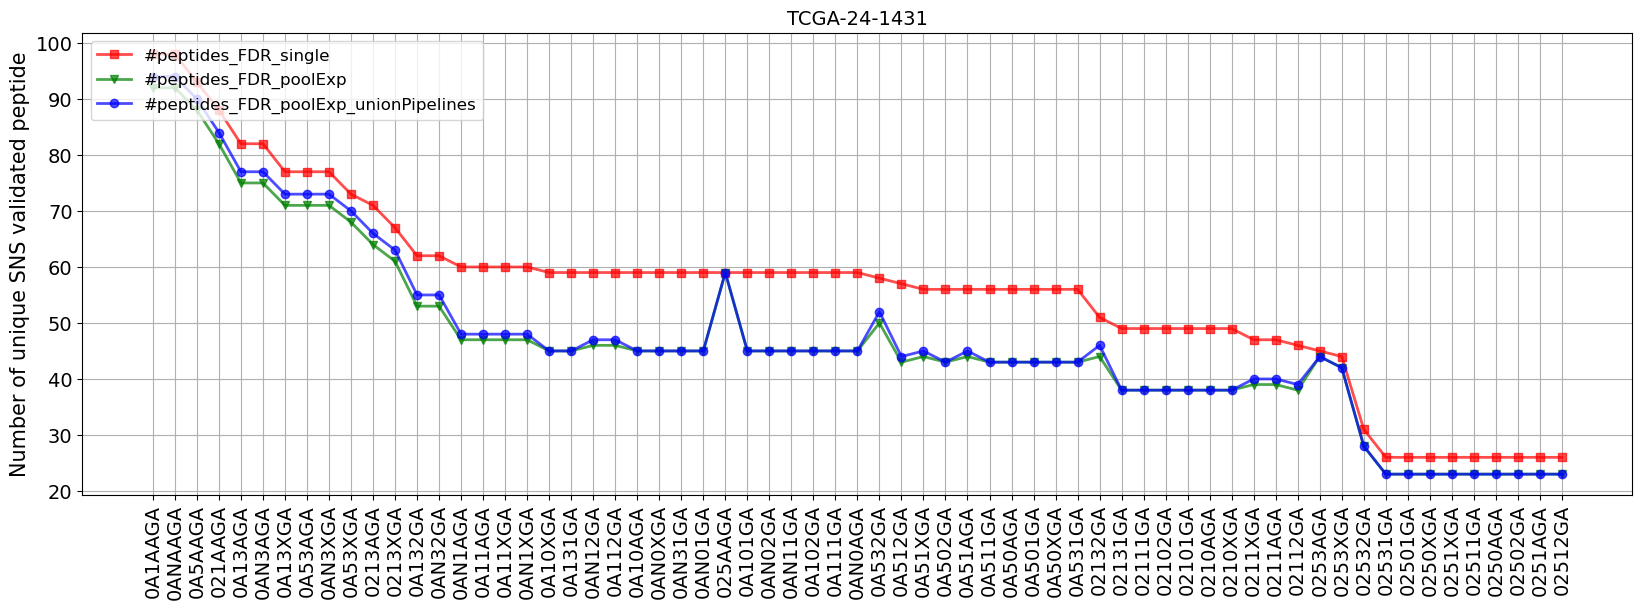

In [147]:
barplot_3_lines(df_plot, 
               col1='#peptides_FDR_single', 
               col2='#peptides_FDR_poolExp', 
               col3='#peptides_FDR_poolExp_unionPipelines', 
               x_var='experiment', 
               sample_type=sample, 
               save_suffix=f'FDR{int(FDR_limit*100)}%', 
               base_plot='', 
               save=False)

In [ ]:
# TODO, separate background and foreground one?